In [1]:
import numpy as np 
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
skill = pd.read_csv('ready_for_model.csv')
resume_psu = pd.read_csv('resume_psu.csv', sep=';')
resume_pva = pd.read_csv('resumes_pva.csv', sep=';')

In [3]:
skill

,Unnamed: 0,ownerID,expDescription,4,8,10,11,19,school
0,0,356,i joined the greek system during my sophomore ...,0,0,0,1,0,psu
1,1,356,thon is the largest run student philanthropy i...,0,0,0,0,0,psu
2,2,356,"i have been a waitress at the tavern, a state ...",0,1,1,0,0,psu
3,3,2485,while playing soccer has always been a fun way...,0,0,0,1,0,psu
4,4,2453,test entry,1,0,0,0,0,psu
...,...,...,...,...,...,...,...,...,...
4937,4937,4613,in this project i thought abuot a financial de...,0,0,0,0,1,pva
4938,4938,4636,i chose 3 different colleges that i could go t...,0,0,0,0,1,pva
4939,4939,4668,"for this project, we had to obtain a credit ca...",0,1,0,0,0,pva
4940,4940,4613,"in this project, we were given successful entr...",0,1,0,0,0,pva


In [4]:
number_rows = len(skill)
skill['each_len']=0
for i in range(number_rows):
    lent= 0
    lent = len(str(skill['expDescription'][i]))
    skill['each_len'][i] = len(str(skill['expDescription'][i]))

<ipython-input-4-89653c0f6172>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill['each_len'][i] = len(str(skill['expDescription'][i]))


In [6]:
import seaborn as sns

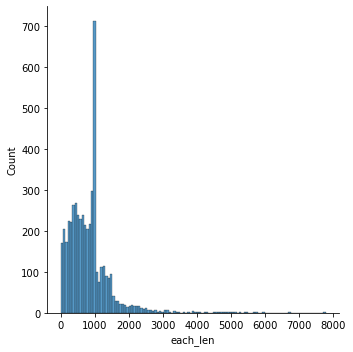

In [7]:
sns.displot(skill, x="each_len")

In [8]:
stopwords = set(STOPWORDS)

In [9]:
skill = skill.rename(columns = {'4': 'ct', '8': 'ps','10':'aa','11':'tw','19':'cm'}, 
                     inplace = False)

In [10]:
skill['expDescription'] = skill['expDescription'].astype(str)
skill.dtypes

Unnamed: 0         int64
ownerID            int64
expDescription    object
ct                 int64
ps                 int64
aa                 int64
tw                 int64
cm                 int64
school            object
each_len           int64
dtype: object

In [11]:
#creative thinking
creative_thinking = skill[(skill.ct != 0)]
problem_solving = skill[(skill.ps != 0)]
adapt_ablity = skill[(skill.aa != 0)]
team_work = skill[(skill.tw != 0)]
communication = skill[(skill.cm != 0)]

In [39]:
text_ct = creative_thinking["expDescription"].values
text_ct = " ".join(text_ct)

text_ps = problem_solving["expDescription"].values
text_ps = " ".join(text_ps)

text_aa = adapt_ablity["expDescription"].values
text_aa = " ".join(text_aa)

text_tw = team_work["expDescription"].values
text_tw = " ".join(text_tw)

text_cm = communication["expDescription"].values
text_cm = " ".join(text_cm)

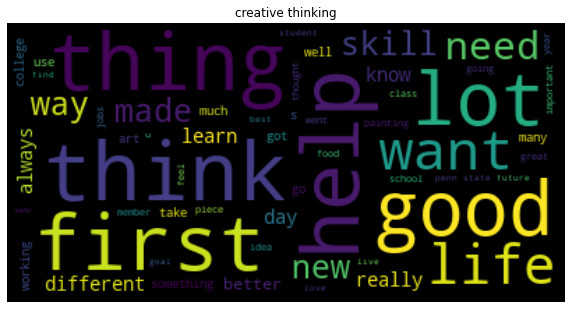

In [40]:
# for the word cloud part, I learned the way to build wordcloud at
#https://www.datacamp.com/community/tutorials/wordcloud-python
########################################################################
#for creative thinking, most common words experience, think
stop_words = ["time", "work", "one",'people','job','will','team','project','experience',
             'group','learned','able','make','nbsp'] + list(STOPWORDS)
stopwords = set(stop_words)
wc = WordCloud(max_words=5000,
               min_font_size=5, 
               stopwords=stopwords, 
               background_color="black", 
               margin=10,
               random_state=21).generate(text_ct)
plt.figure(figsize=(10, 10))
plt.title("creative thinking")
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

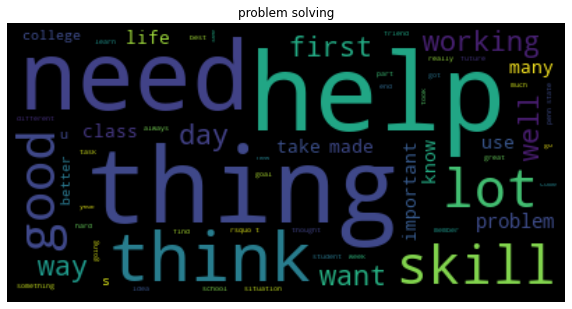

In [41]:
#for problem solving people, most common words are group, learned 
stop_words = ["time", "work", "one",'people','job','will','team','project','experience',
             'group','learned','able','make','nbsp'] + list(STOPWORDS)
stopwords = set(stop_words)
wc = WordCloud(max_words=5000, 
               min_font_size=5, 
               stopwords=stopwords, 
               background_color="black", 
               margin=10, 
               random_state=42).generate(text_ps)
plt.figure(figsize=(10, 10))
plt.title("problem solving")
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

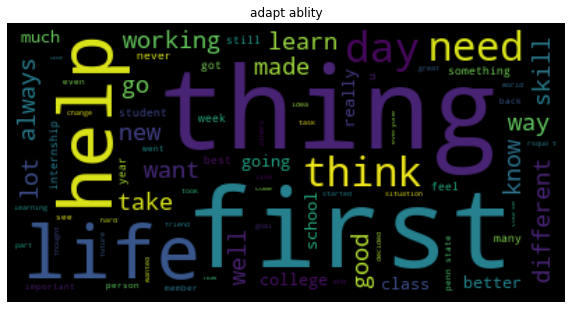

In [42]:
#for adapt ablity, most common words are experience,learned
stop_words = ["time", "work", "one",'people','job','will','team','project','experience',
             'group','learned','able','make','nbsp'] + list(STOPWORDS)
stopwords = set(stop_words)
wc = WordCloud(max_words=5000,
               min_font_size=5, 
               stopwords=stopwords,
               background_color="black", 
                margin=10, 
               random_state=1).generate(text_aa)
plt.figure(figsize=(10, 10))
plt.title("adapt ablity")
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

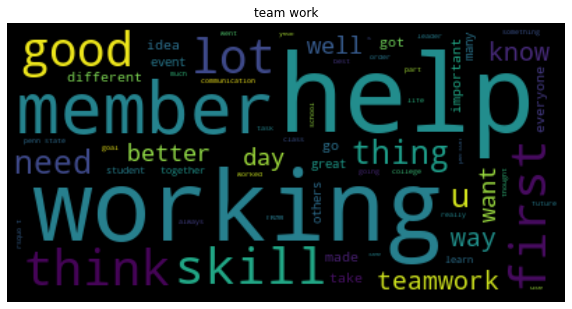

In [43]:
#for team work, most common words are workinh,help,member,first
stop_words = ["time", "work", "one",'people','job','will','team','project','experience',
             'group','learned','able','make','nbsp'] + list(STOPWORDS)
stopwords = set(stop_words)
wc = WordCloud(max_words=5000, 
               min_font_size=5, 
                stopwords=stopwords, 
                background_color="black", 
                margin=10, 
               random_state=1).generate(text_tw)
plt.figure(figsize=(10, 10))
plt.title("team work")
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

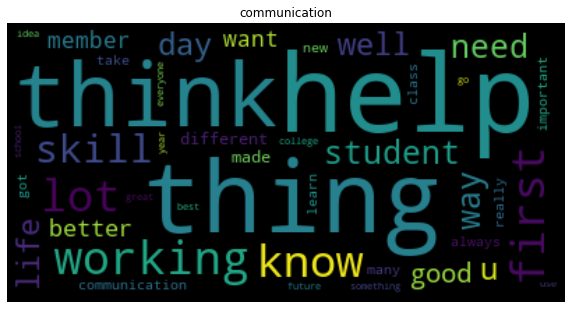

In [44]:
#for communication, most common words are help,thing,working,good,well
stop_words = ["time", "work", "one",'people','job','will','team','project','experience',
             'group','learned','able','make','nbsp'] + list(STOPWORDS)
stopwords = set(stop_words)
wc = WordCloud(max_words=5000, 
               min_font_size=5, 
               stopwords=stopwords, 
               background_color="black", 
               margin=10,
               random_state=1).generate(text_cm)
plt.figure(figsize=(10, 10))
plt.title("communication")
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

In [13]:
user_info = resume_psu.append(resume_pva, sort=False,ignore_index=True)

In [14]:
user_info= user_info[["ownerID","name", "majorID","gradYear","gpa"]]

In [15]:
user_info.head()

,ownerID,name,majorID,gradYear,gpa
0,27,Ricky Jabarin,40,2016,3.50
1,2453,Mike Watson,33,2016,3.82
2,2485,Caroline Head,42,2016,3.56
3,356,Meghan Miceli,44,2015,3.50
4,2568,Kristine Ona,65,2017,3.74


In [16]:
mix_table = pd.merge(skill, user_info, how="inner", on=["ownerID"])

In [17]:
mix_table =mix_table.drop_duplicates()
mix_table

,Unnamed: 0,ownerID,expDescription,ct,ps,aa,tw,cm,school,name,majorID,gradYear,gpa
0,0,356,i joined the greek system during my sophomore ...,0,0,0,1,0,psu,Meghan Miceli,44,2015,3.5
2,1,356,thon is the largest run student philanthropy i...,0,0,0,0,0,psu,Meghan Miceli,44,2015,3.5
4,2,356,i have been a waitress at the tavern a state c...,0,1,1,0,0,psu,Meghan Miceli,44,2015,3.5
6,29,356,as an art history minor ive spent a lot of tim...,1,0,0,0,0,psu,Meghan Miceli,44,2015,3.5
8,33,356,during my sophomore year i got involved with a...,0,0,0,1,0,psu,Meghan Miceli,44,2015,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,4927,5750,nbsp the total estimate of what i have to pay ...,0,0,0,0,1,pva,Abagail Hagelgans,0,0,0.0
9305,4932,4603,some characteristics of an entrepreneur are cr...,0,0,0,0,1,pva,Jakub Flaska,0,0,0.0
9306,4932,4603,some characteristics of an entrepreneur are cr...,0,0,0,0,1,pva,Jakub Flaska,0,2024,0.0
9307,4933,4611,the project we were working on involved gettin...,0,0,0,0,0,pva,Jacob Musser,0,0,0.0


In [19]:
clean_table = mix_table[(mix_table.majorID != 0) & (mix_table.gradYear != 0) & 
                        (mix_table.gpa != 0.0)]

In [20]:
clean_table

,Unnamed: 0,ownerID,expDescription,ct,ps,aa,tw,cm,school,name,majorID,gradYear,gpa
0,0,356,i joined the greek system during my sophomore ...,0,0,0,1,0,psu,Meghan Miceli,44,2015,3.50
2,1,356,thon is the largest run student philanthropy i...,0,0,0,0,0,psu,Meghan Miceli,44,2015,3.50
4,2,356,i have been a waitress at the tavern a state c...,0,1,1,0,0,psu,Meghan Miceli,44,2015,3.50
6,29,356,as an art history minor ive spent a lot of tim...,1,0,0,0,0,psu,Meghan Miceli,44,2015,3.50
8,33,356,during my sophomore year i got involved with a...,0,0,0,1,0,psu,Meghan Miceli,44,2015,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,3053,5016,one of the biggest failure happened during thi...,0,1,0,0,0,psu,Kuan-Yu Liao,99,2020,3.57
6135,3059,5016,one of the best parts to be a penn state stude...,0,0,0,0,0,psu,Kuan-Yu Liao,99,2020,3.57
6137,3096,5016,the other day kerry gave us a chance for us to...,0,0,0,0,0,psu,Kuan-Yu Liao,99,2020,3.57
6139,3104,5016,this is my very first time to visit the arts f...,0,0,0,0,0,psu,Kuan-Yu Liao,99,2020,3.57


In [22]:
#display the unique value of each column
print(clean_table['majorID'].unique())
print(clean_table['gradYear'].unique())
print(clean_table['gpa'].unique())

[ 44  42  33  99  65 100  41  38  78  85  86  74  95  82 120  93  94   4
  84   8 114 157  75  59 113  35  11   7 151 152  96 154  19  77  58  28
 147  16 108  79  90  89  98  97 110 137  88  92  40  34 112  53  76]
[2015 2016 2019 2017 2018 2020 2021]
[3.5  3.56 3.82 3.84 3.74 3.67 3.7  3.8  3.86 3.51 2.9  3.76 4.   3.22
 3.11 2.85 3.45 3.34 3.97 3.87 3.55 3.3  3.89 3.69 3.04 3.6  3.94 3.43
 3.4  3.54 3.95 3.42 3.85 3.13 3.39 2.36 3.2  3.47 3.36 3.83 3.18 3.24
 3.9  3.1  3.99 3.72 3.49 3.65 3.32 2.82 3.63 2.96 2.37 3.81 3.03 2.92
 3.41 3.62 3.77 3.12 3.16 3.14 3.57 3.25 3.33 3.59 3.27 3.53 3.48 3.37
 2.48 3.92 2.98 2.97 3.44 2.99 4.59 3.   3.75 3.46 3.58 3.78 3.71 3.38
 3.66 3.35 3.01 3.21 3.73 3.28 2.4  2.91 3.61 3.64 2.61 3.26 3.93 3.09
 3.31 2.7  3.29 2.34 2.5  2.86 3.06 3.19 2.43 2.18 2.   2.8  2.42 2.6
 1.47 3.91 3.98 3.96 3.52 3.88 2.58 2.95 3.79 4.1  2.88 3.15 3.68 3.07
 3.23]


In [23]:
major_distribution = clean_table.groupby('majorID')['ownerID'].nunique()
major_distribution= pd.DataFrame(data=major_distribution)
#major_distribution = major_distribution.reset_index()
major_distribution = major_distribution.sort_values(by=['ownerID'], ascending=False)

In [24]:
major_distribution.head(10)

,ownerID
majorID,
85,187
94,55
38,36
99,22
93,16
96,11
33,11
89,9
97,8


In [25]:
grad_year_distribution = clean_table.groupby('gradYear')['ownerID'].nunique()
grad_year_distribution= pd.DataFrame(data=grad_year_distribution)
grad_year_distribution = grad_year_distribution.sort_values(by=['ownerID'], ascending=False)

In [26]:
grad_year_distribution

,ownerID
gradYear,
2017,204
2018,104
2019,80
2016,41
2020,16
2021,2
2015,1


<ipython-input-28-d440e323b08d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_major_graduate_year['majorID'] = select_major_graduate_year['majorID'].astype(str)
<ipython-input-28-d440e323b08d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_major_graduate_year['gradYear'] = select_major_graduate_year['gradYear'].astype(str)


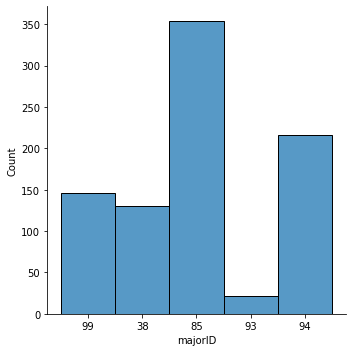

In [28]:
#many major are only a few record, so we will focus on the major who have at least 15 people
select_major_graduate_year = clean_table[((clean_table.majorID == 85) | (clean_table.majorID == 94)|
                                          (clean_table.majorID == 38) | (clean_table.majorID == 99)|
                                          (clean_table.majorID == 93))&((clean_table.gradYear == 2017)|
                                          (clean_table.gradYear == 2018)|(clean_table.gradYear == 2019)|
                                          (clean_table.gradYear == 2016))]
select_major_graduate_year['majorID'] = select_major_graduate_year['majorID'].astype(str)
select_major_graduate_year['gradYear'] = select_major_graduate_year['gradYear'].astype(str)
#visualized the distribution of major ID
sns.displot(select_major_graduate_year, x="majorID")

In [29]:
select_major_graduate_year = select_major_graduate_year.drop(['Unnamed: 0'], axis=1)
select_major_graduate_year

,ownerID,expDescription,ct,ps,aa,tw,cm,school,name,majorID,gradYear,gpa
34,2786,i voluntarily worked with local universities s...,0,1,1,0,0,psu,Tianchen Zhang,99,2019,3.84
36,2786,i volunteered as a assistant teacher in huaxia...,0,0,0,0,0,psu,Tianchen Zhang,99,2019,3.84
38,2786,i am the pennsylvania prolife oratory contest...,0,1,0,0,0,psu,Tianchen Zhang,99,2019,3.84
40,2786,as a freshman at state college i received an i...,1,0,0,1,0,psu,Tianchen Zhang,99,2019,3.84
68,2756,paws of friendship is a club on campus that ra...,1,0,0,1,0,psu,Deja Hinnant,99,2018,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4977,during the last eveluationnbspi was advised to...,0,0,0,0,0,psu,Manae Young,99,2018,3.78
4998,4977,mynbspfavorite thing experience at the arts fe...,1,0,0,0,0,psu,Manae Young,99,2018,3.78
5001,4977,the project that im most involved in is sa fun...,0,1,0,0,0,psu,Manae Young,99,2018,3.78
5004,4977,last semester i had to kick off one ofnbspthe ...,0,1,0,1,1,psu,Manae Young,99,2018,3.78


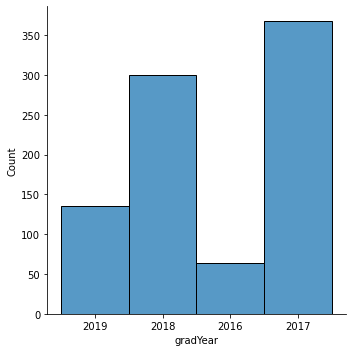

In [30]:
#visualized the distribution of grad year
sns.displot(select_major_graduate_year, x="gradYear")

In [31]:
#multiply by 100, manipulate the skill level
select_major_graduate_year = select_major_graduate_year.reset_index(drop=True)
for i in range(len(select_major_graduate_year)):
    select_major_graduate_year['ct'][i] = select_major_graduate_year['ct'][i]*100
    select_major_graduate_year['ps'][i] = select_major_graduate_year['ps'][i]*100
    select_major_graduate_year['aa'][i] = select_major_graduate_year['aa'][i]*100
    select_major_graduate_year['tw'][i] = select_major_graduate_year['tw'][i]*100
    select_major_graduate_year['cm'][i] = select_major_graduate_year['cm'][i]*100
    

<ipython-input-31-b39aa068d3a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_major_graduate_year['ct'][i] = select_major_graduate_year['ct'][i]*100
<ipython-input-31-b39aa068d3a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_major_graduate_year['ps'][i] = select_major_graduate_year['ps'][i]*100
<ipython-input-31-b39aa068d3a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_major_graduate_year['aa'][i] = selec

In [32]:
select_major_graduate_year

,ownerID,expDescription,ct,ps,aa,tw,cm,school,name,majorID,gradYear,gpa
0,2786,i voluntarily worked with local universities s...,0,100,100,0,0,psu,Tianchen Zhang,99,2019,3.84
1,2786,i volunteered as a assistant teacher in huaxia...,0,0,0,0,0,psu,Tianchen Zhang,99,2019,3.84
2,2786,i am the pennsylvania prolife oratory contest...,0,100,0,0,0,psu,Tianchen Zhang,99,2019,3.84
3,2786,as a freshman at state college i received an i...,100,0,0,100,0,psu,Tianchen Zhang,99,2019,3.84
4,2756,paws of friendship is a club on campus that ra...,100,0,0,100,0,psu,Deja Hinnant,99,2018,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...
863,4977,during the last eveluationnbspi was advised to...,0,0,0,0,0,psu,Manae Young,99,2018,3.78
864,4977,mynbspfavorite thing experience at the arts fe...,100,0,0,0,0,psu,Manae Young,99,2018,3.78
865,4977,the project that im most involved in is sa fun...,0,100,0,0,0,psu,Manae Young,99,2018,3.78
866,4977,last semester i had to kick off one ofnbspthe ...,0,100,0,100,100,psu,Manae Young,99,2018,3.78


In [33]:
skill_groupby_year = select_major_graduate_year.groupby('gradYear')['ct','ps','aa','tw','cm'].mean()
skill_groupby_year

,ct,ps,aa,tw,cm
gradYear,,,,,
2016,50.000000,40.625000,31.250000,45.312500,45.312500
2017,49.728261,30.706522,21.195652,48.097826,44.021739
2018,29.666667,42.000000,17.333333,60.666667,37.666667
2019,31.617647,31.617647,26.470588,41.911765,43.382353


Text(0, 0.5, 'skill level')

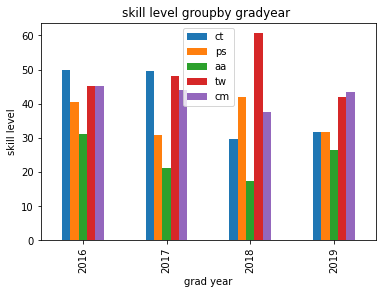

In [35]:
skill_groupby_year.plot(kind="bar")
plt.title("skill level groupby gradyear ")
plt.xlabel("grad year")
plt.ylabel("skill level")


In [37]:
skill_groupby_majorid = select_major_graduate_year.groupby('majorID')['ct','ps','aa','tw','cm'].mean()
skill_groupby_majorid

,ct,ps,aa,tw,cm
majorID,,,,,
38,23.076923,40.000000,8.461538,85.384615,47.692308
85,55.367232,33.615819,21.468927,47.457627,41.525424
93,45.454545,27.272727,18.181818,40.909091,45.454545
94,29.166667,31.018519,28.240741,43.981481,41.203704
99,32.876712,43.835616,23.287671,42.465753,37.671233


Text(0, 0.5, 'skill level')

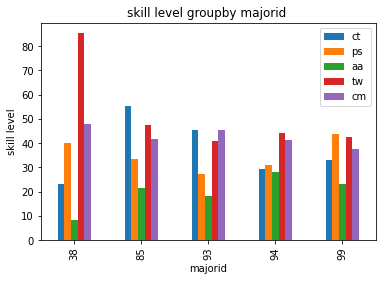

In [38]:
skill_groupby_majorid.plot(kind="bar")
plt.title("skill level groupby majorid ")
plt.xlabel("majorid")
plt.ylabel("skill level")

In [40]:
select_major_graduate_year.groupby('majorID')['ct','ps','aa','tw','cm'].mean()

,ct,ps,aa,tw,cm
majorID,,,,,
38,23.076923,40.000000,8.461538,85.384615,47.692308
85,55.367232,33.615819,21.468927,47.457627,41.525424
93,45.454545,27.272727,18.181818,40.909091,45.454545
94,29.166667,31.018519,28.240741,43.981481,41.203704
99,32.876712,43.835616,23.287671,42.465753,37.671233


In [41]:
select_major_graduate_year.groupby(['majorID','gradYear'])['ct','ps','aa','tw','cm'].mean()

ct         ps         aa         tw         cm
majorID gradYear                                                        
38      2017       27.272727  27.272727   9.090909  54.545455  63.636364
        2018       21.428571  43.750000   8.928571  91.071429  43.750000
        2019       42.857143   0.000000   0.000000  42.857143  85.714286
85      2016       63.157895  26.315789  36.842105  47.368421  31.578947
        2017       54.576271  30.847458  20.338983  48.813559  43.389831
        2018       58.333333  63.888889  22.222222  38.888889  30.555556
        2019       50.000000   0.000000  25.000000  25.000000  50.000000
93      2016       80.000000  20.000000  60.000000  40.000000  80.000000
        2017       50.000000  25.000000   0.000000  62.500000  37.500000
        2018       12.500000  37.500000  12.500000  25.000000  37.500000
        2019      100.000000   0.000000   0.000000   0.000000   0.000000
94      2016       33.333333  25.000000  33.333333  41.666667  58.333333
        2017       23.333333  20.000000  40.000000  36.666667  43.333333
        2018       28.571429  33.928571  21.428571  50.000000  32.142857
        2019       30.508475  33.050847  27.966102  43.220339  43.220339
99      2016       42.857143  60.714286  21.428571  46.428571  42.857143
        2017       33.333333  45.833333  20.833333  45.833333  45.833333
        2018       30.681818  36.363636  23.863636  40.909091  36.363636
        2019       16.666667  66.666667  33.333333  33.333333   0.000000

In [42]:
select_major_graduate_year.groupby(['majorID','gradYear'])['gpa'].mean()

majorID  gradYear
38       2017        3.518182
         2018        3.495536
         2019        3.512857
85       2016        3.381053
         2017        3.490881
         2018        3.645556
         2019        3.922500
93       2016        3.312000
         2017        3.393750
         2018        3.610000
         2019        3.980000
94       2016        3.296667
         2017        2.977333
         2018        2.994286
         2019        3.188305
99       2016        3.176429
         2017        3.291250
         2018        3.390341
         2019        3.733333
Name: gpa, dtype: float64